In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

0 / 1080
0 / 1080
24 / 1080
24 / 1080


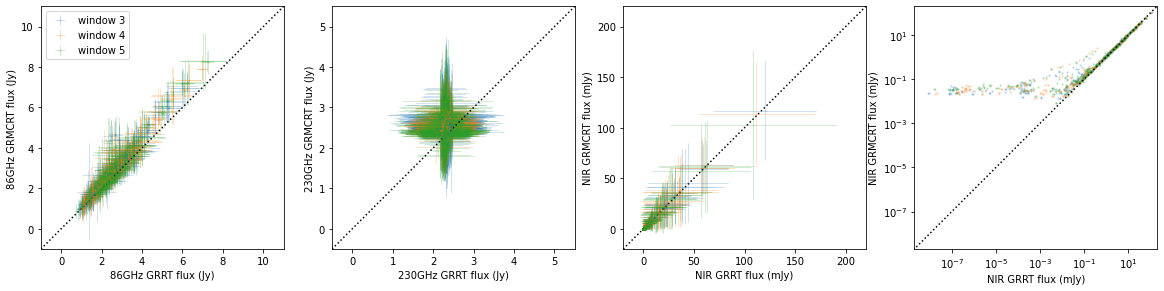

In [2]:
def GRRT_vs_MCRT(ax, freq, lim, log=False):
    
    df1 = pd.read_csv(f'cache/Illinois_thermal_w3/stat_{freq}_lc.tsv',  sep='\t')
    df2 = pd.read_csv(f'cache/Illinois_thermal_w3/stat_{freq}_sed.tsv', sep='\t')

    df3 = pd.read_csv(f'cache/Illinois_thermal_w4/stat_{freq}_lc.tsv',  sep='\t')
    df4 = pd.read_csv(f'cache/Illinois_thermal_w4/stat_{freq}_sed.tsv', sep='\t')

    df5 = pd.read_csv(f'cache/Illinois_thermal_w5/stat_{freq}_lc.tsv',  sep='\t')
    df6 = pd.read_csv(f'cache/Illinois_thermal_w5/stat_{freq}_sed.tsv', sep='\t')

    m = np.max([df1.med, df2.med, df3.med, df4.med, df5.med, df6.med])
    
    if m < 1:
        f = 1000
        p = 'm'
    else:
        f = 1
        p = ''
        
    if log:
        fmts = {'s':2, 'linewidth':1, 'alpha':0.2}
        ax.scatter(f*df1['mean'], f*df2['mean'], **fmts, label='window 3')
        ax.scatter(f*df3['mean'], f*df4['mean'], **fmts, label='window 4')
        ax.scatter(f*df5['mean'], f*df6['mean'], **fmts, label='window 5')
        ax.set_xlim(1e-11*lim, lim)
        ax.set_ylim(1e-11*lim, lim)
        ax.set_xscale('log')
        ax.set_yscale('log')
    else:
        fmts = {'fmt':'.', 'markersize':2, 'linewidth':1, 'alpha':0.2}
        ax.errorbar(f*df1['mean'], f*df2['mean'], xerr=f*df1['std'], yerr=f*df2['std'], **fmts, label='window 3')
        ax.errorbar(f*df3['mean'], f*df4['mean'], xerr=f*df3['std'], yerr=f*df4['std'], **fmts, label='window 4')
        ax.errorbar(f*df5['mean'], f*df6['mean'], xerr=f*df5['std'], yerr=f*df6['std'], **fmts, label='window 5')
        ax.set_xlim(-0.1*lim, 1.1*lim)
        ax.set_ylim(-0.1*lim, 1.1*lim)
        
    ax.plot([-0.1*lim, 1.1*lim], [-0.1*lim, 1.1*lim], ':', color='k')

    print(np.count_nonzero((df1['mean'] < 1e-3) & (df2['mean'] > 1e-3)) +
          np.count_nonzero((df3['mean'] < 1e-3) & (df4['mean'] > 1e-3)) +
          np.count_nonzero((df5['mean'] < 1e-3) & (df6['mean'] > 1e-3)),
          '/', 3 * len(df1))
    
    ax.set_aspect('equal')
    ax.set_xlabel(f'{freq} GRRT flux ({p}Jy)')
    ax.set_ylabel(f'{freq} GRMCRT flux ({p}Jy)')
    
fig, axes = plt.subplots(1,4, figsize=(20,5))
GRRT_vs_MCRT(axes[0], '86GHz',  10)
GRRT_vs_MCRT(axes[1], '230GHz', 5)
GRRT_vs_MCRT(axes[2], 'NIR',    200)
GRRT_vs_MCRT(axes[3], 'NIR',    200, log=True)
axes[0].legend()
fig.savefig('output/GRRT_vs_MCRT.pdf')
fig.savefig('output/GRRT_vs_MCRT.png', dpi=300)